In [1]:
from environment.TheoreticalMarket import *
import numpy as np

tm = TheoreticalMarket(beta0 = 30, beta1 = -1.1, beta2 = -2, a = 0.1, ref_p = 1.5)
# tm = TheoreticalMarket(beta0 = 30, beta1 = -1.1, beta2 = -2, a = 0.1, ref_p = 3.9)
# tm = TheoreticalMarket(beta0 = 300, beta1 = -1.1, beta2 = -20, a = 0.05, ref_p = 10)

In [2]:
ref_prices = np.linspace(0.01, 10, 50)

# Config 1
# beta0 = 27
# beta1 = -1.1
# beta2 = -1.0
# a = 0.1

# Config 2
# beta0 = 25
# beta1 = -0.6
# beta2 = -6.1
# a = 0.1

# Config 3
beta0 = 15
beta1 = -1.05
beta2 = -3.1
a = 0.1

# Config 4
# beta0 = 13
# beta1 = -5.05
# beta2 = -2.1
# a = 0.2


# Config 5
# beta0 = 27
# beta1 = -3.05
# beta2 = -1.1
# a = 0.2

prices = np.array([get_nash_eps_curve(r, beta0, beta1, beta2, a)[0] for r in ref_prices])
devs = np.array([get_nash_eps_curve(r, beta0, beta1, beta2, a)[1] for r in ref_prices])
demand = np.array([get_nash_eps_curve(r, beta0, beta1, beta2, a)[2] for r in ref_prices])

/home/larkin/code/dqn-marl/environment/TheoreticalMarket.py:43: RuntimeWarning: divide by zero encountered in double_scalars
  return (self.gamma / self.demand_func(x)) - (1 / x)
/home/larkin/code/dqn-marl/environment/TheoreticalMarket.py:46: RuntimeWarning: divide by zero encountered in double_scalars
  return self.gamma / (self.demand_func(x) * x )
/home/larkin/code/dqn-marl/environment/TheoreticalMarket.py:51: RuntimeWarning: invalid value encountered in double_scalars
  square_term = np.max([0, np.power(c1, 2) - c1 + 4*(c2 -1)*c2 - 2*c2])


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 

y = ref_prices
x = prices[0]
X, Y = np.meshgrid(x, y) 
z = devs

In [4]:
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.contour3D(X, Y, devs, 999, cmap='viridis')
# ax.set_xlabel('Market Price')
# ax.set_ylabel('Reference Price')
# ax.set_zlabel('Epsilon Deviation')

Text(0.5, 0.92, 'Epsilon Deviation w.r.t. Market & Reference Price')

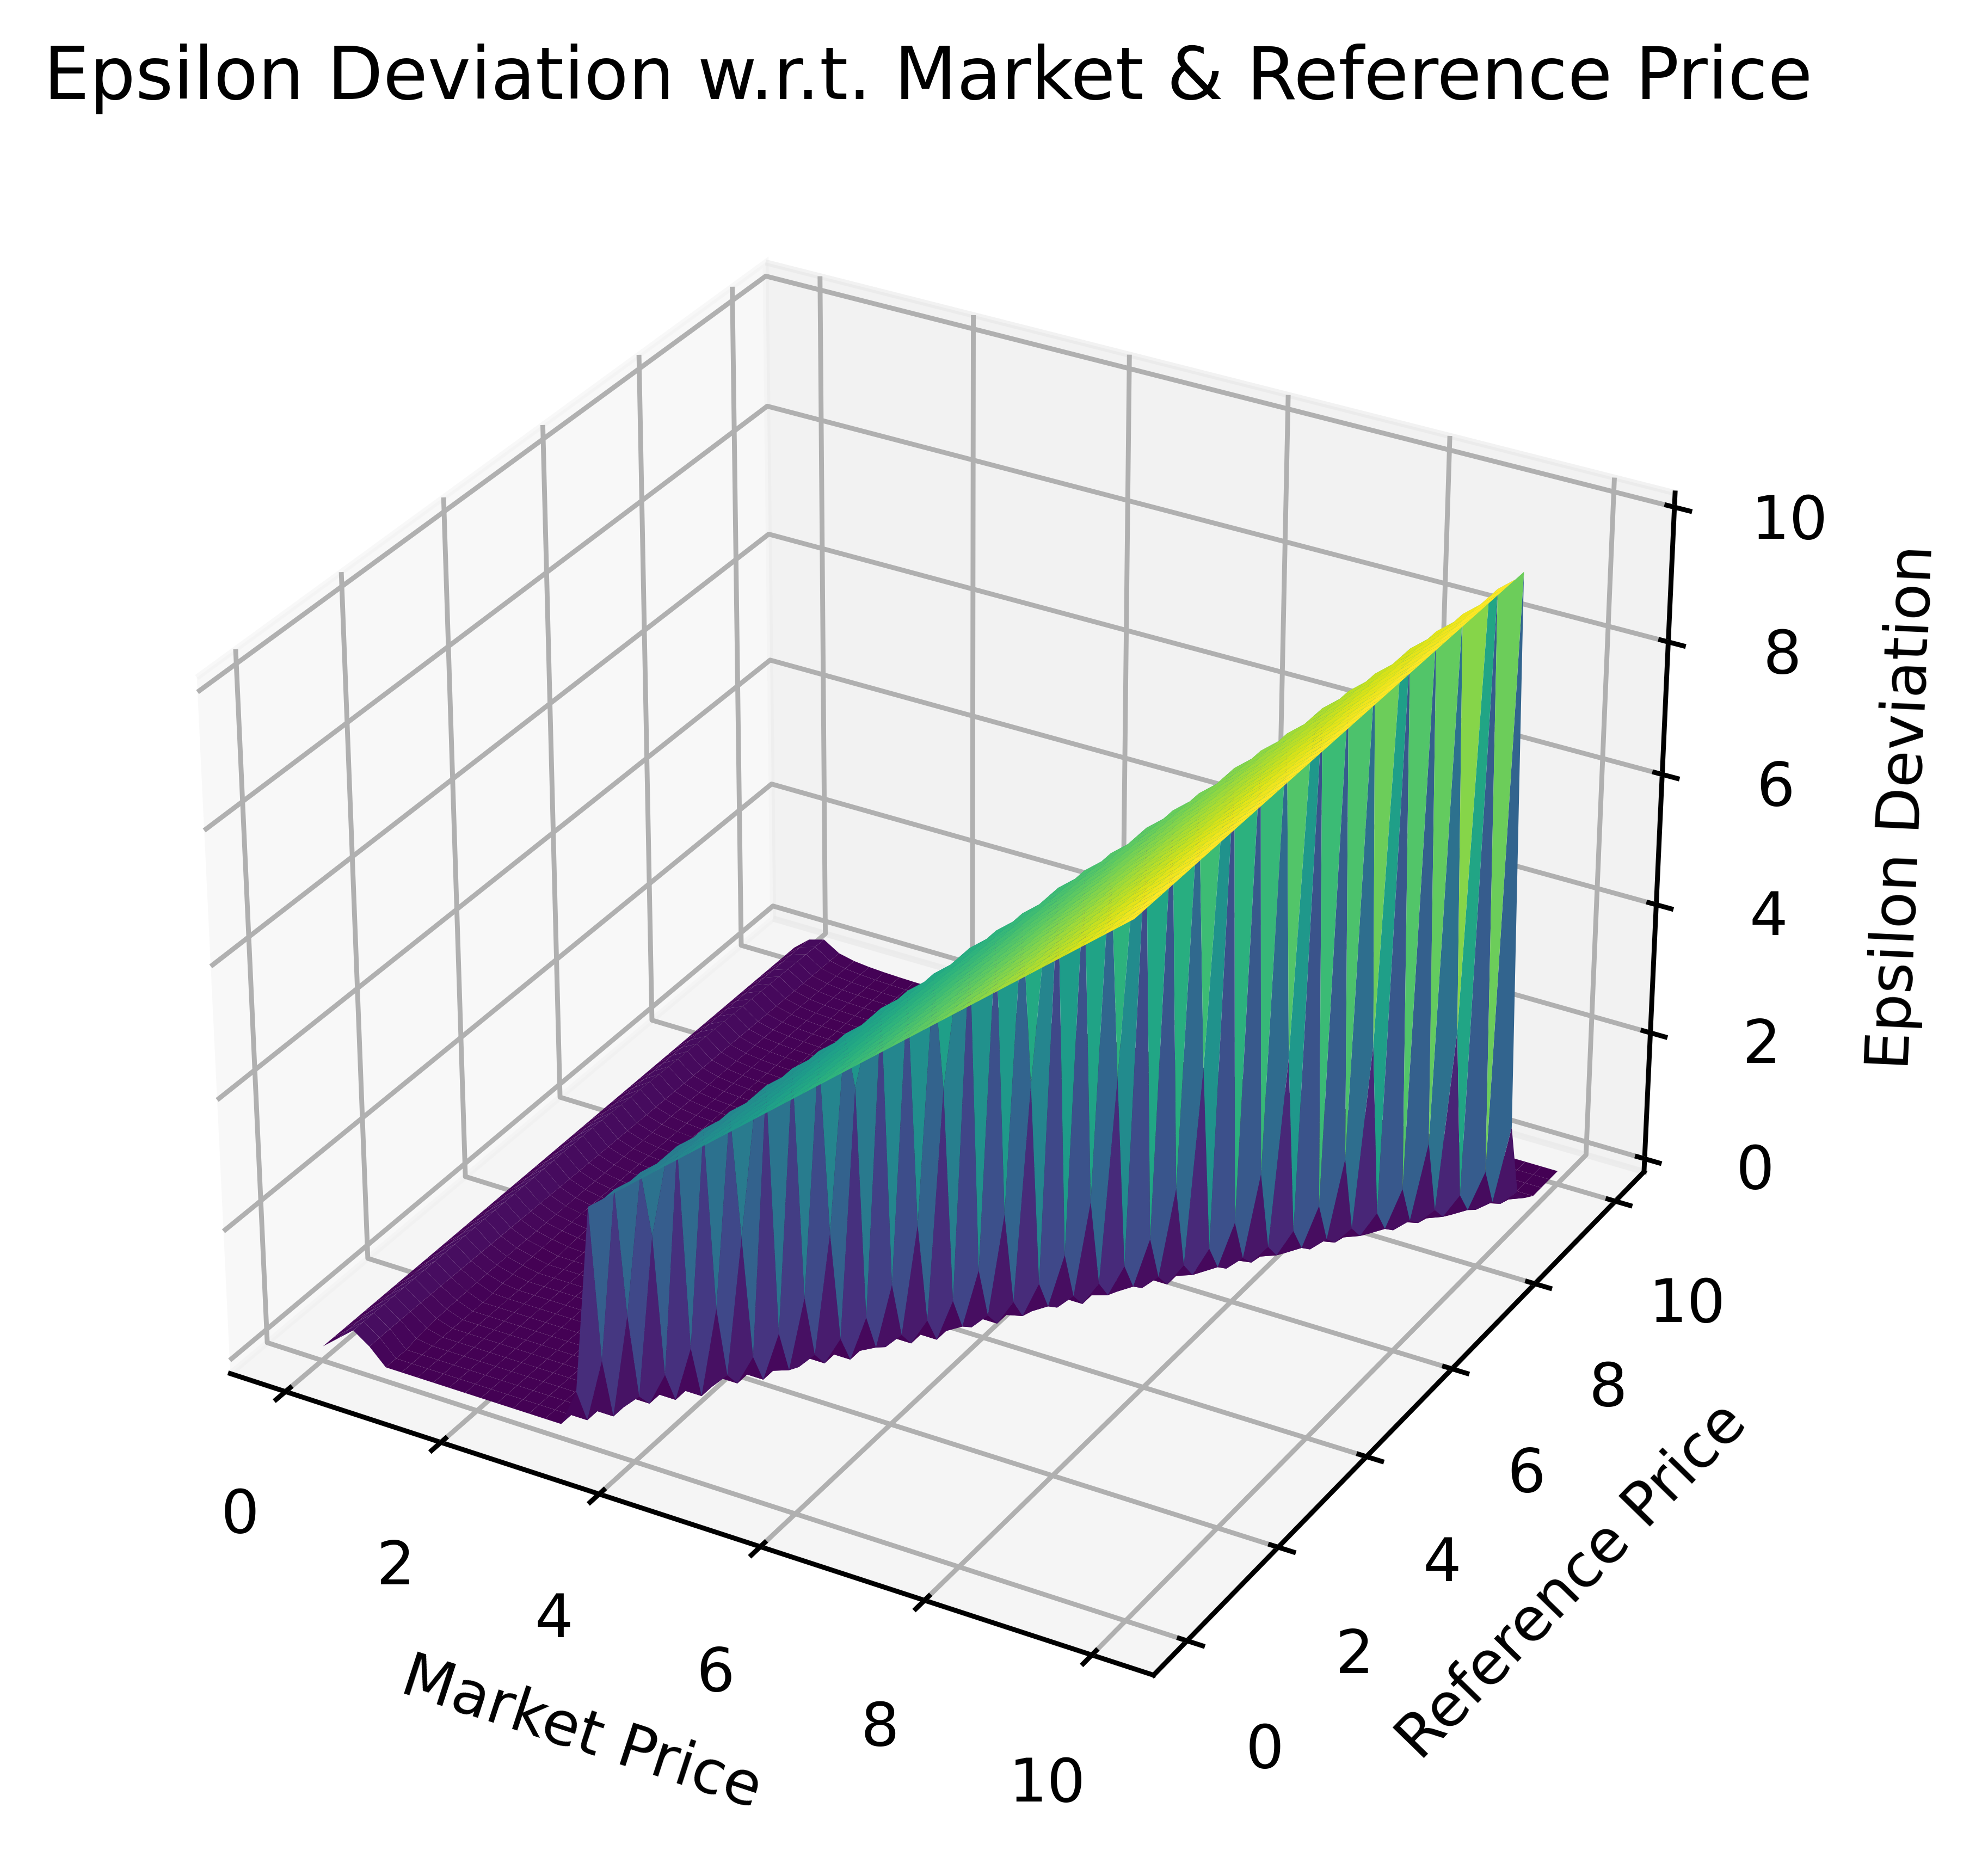

In [5]:
fig = plt.figure(figsize = (7, 5), dpi = 800)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, devs, cmap='viridis', edgecolor='none')
ax.set_xlabel('Market Price')
ax.set_ylabel('Reference Price')
ax.set_zlabel('Epsilon Deviation')
ax.set_title('Epsilon Deviation w.r.t. Market & Reference Price')

Text(0.5, 0.92, 'Epsilon Deviation w.r.t. Market & Reference Price')

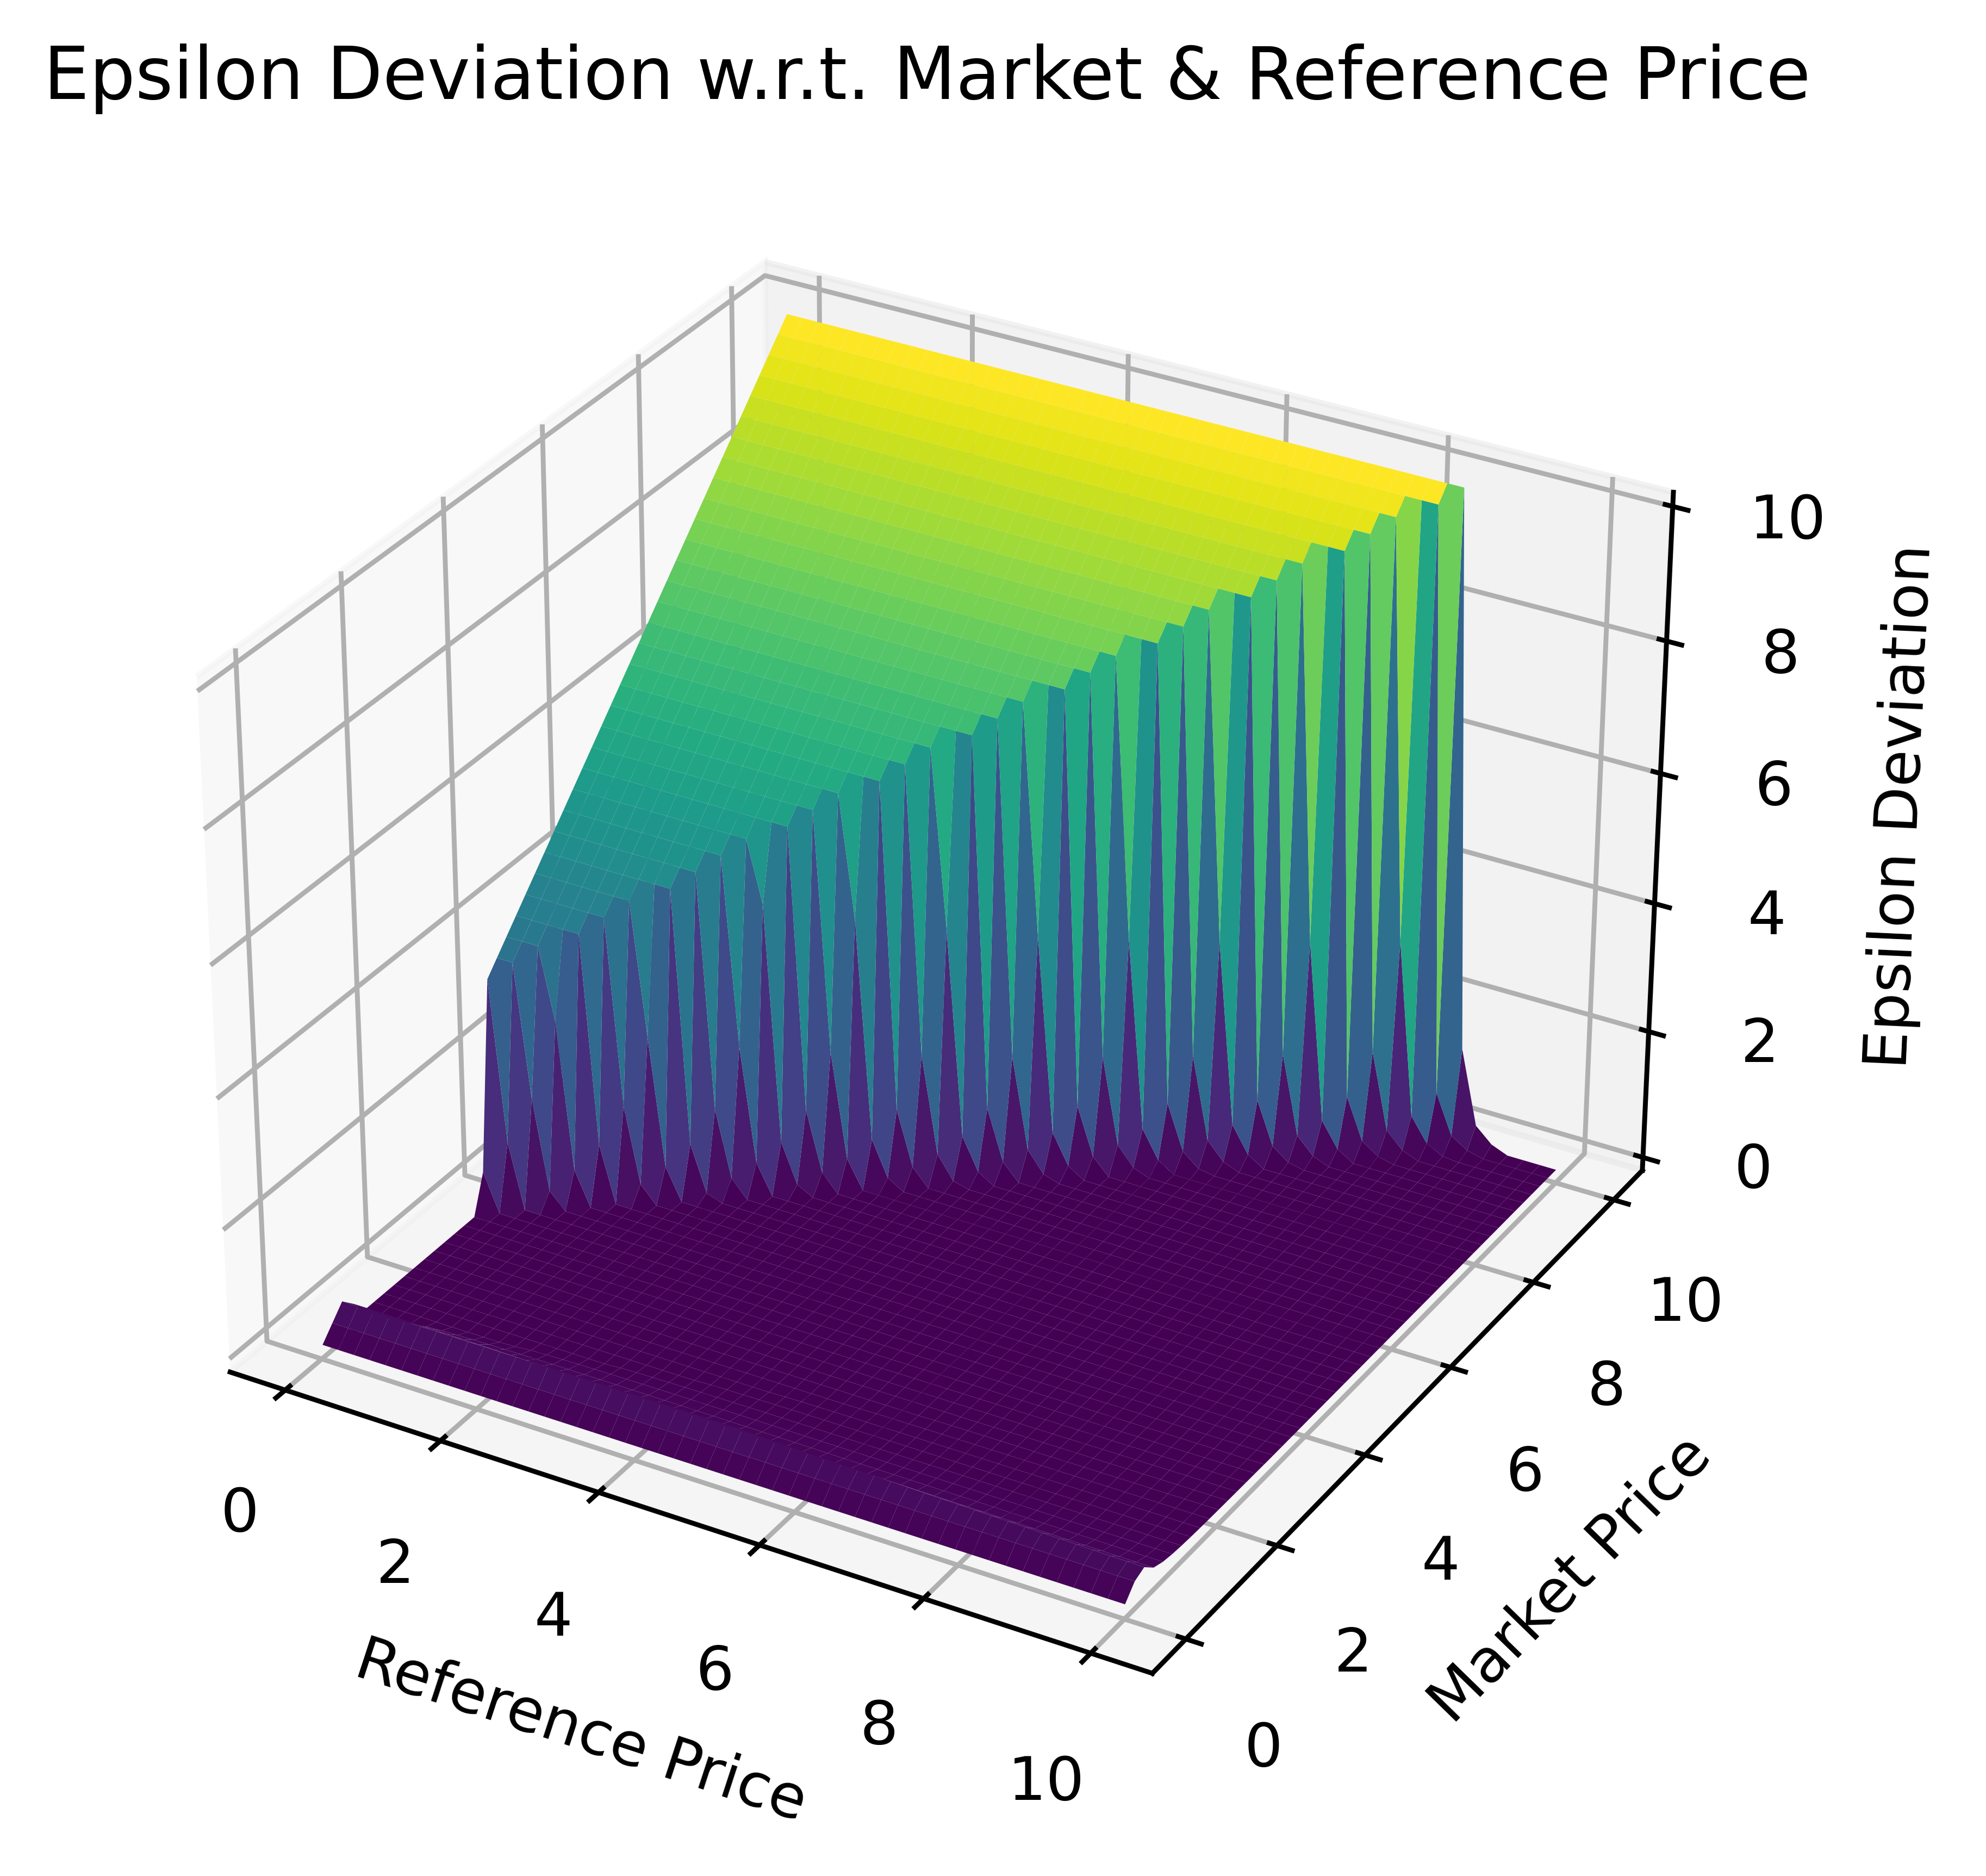

In [6]:
fig = plt.figure(figsize = (7, 5), dpi = 800)
ax = plt.axes(projection='3d')
ax.plot_surface(Y, X, devs, cmap='viridis', edgecolor='none')
ax.set_xlabel('Reference Price')
ax.set_ylabel('Market Price')
ax.set_zlabel('Epsilon Deviation')
ax.set_title('Epsilon Deviation w.r.t. Market & Reference Price')

In [7]:
# Get epsilon range
# X market price
# Y ref price, all same
# z eps
# Y[44]

min_eps_price, max_eps_price = get_eps0_range(9.9, Y, X, z)
min_eps_price, max_eps_price

(3.2720408163265304, 10.0)

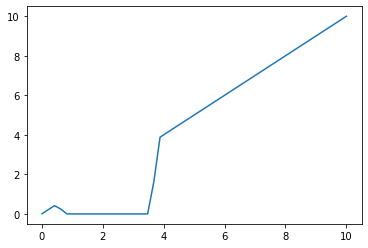

In [8]:
market_prices, nash_eps_curve, _ = get_eps_curves(0.5, Y, X, z)
plt.plot(market_prices, nash_eps_curve)

In [9]:
# plt.plot(prices, np.array(demand))

In [10]:
devs

array([[ 0.01      ,  0.21387755,  0.4177551 , ...,  9.5922449 ,
         9.79612245, 10.        ],
       [ 0.01      ,  0.21387755,  0.4177551 , ...,  9.5922449 ,
         9.79612245, 10.        ],
       [ 0.01      ,  0.21387755,  0.4177551 , ...,  9.5922449 ,
         9.79612245, 10.        ],
       ...,
       [ 0.01      ,  0.21387755,  0.29225433, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01      ,  0.21387755,  0.28851024, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01      ,  0.21387755,  0.28486049, ...,  0.        ,
         0.        ,  0.        ]])

In [11]:
dev_price_list = []
dev_price_arr = np.array([devs, prices])
for i in range(dev_price_arr.shape[1]):
    dev_price_list.append(dev_price_arr[:,i])

In [12]:
dev_price_list

[array([[ 0.01      ,  0.21387755,  0.4177551 ,  0.24494505,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.5816245 ,  3.47591837,  3.67979592,  3.88367347,
          4.08755102,  4.29142857,  4.49530612,  4.69918367,  4.90306122,
          5.10693878,  5.31081633,  5.51469388,  5.71857143,  5.92244898,
          6.12632653,  6.33020408,  6.53408163,  6.73795918,  6.94183673,
          7.14571429,  7.34959184,  7.55346939,  7.75734694,  7.96122449,
          8.16510204,  8.36897959,  8.57285714,  8.77673469,  8.98061224,
          9.1844898 ,  9.38836735,  9.5922449 ,  9.79612245, 10.        ],
        [ 0.01      ,  0.21387755,  0.4177551 ,  0.62163265,  0.8255102 ,
          1.02938776,  1.23326531,  1.43714286,  1.64102041,  1.84489796,
          2.04877551,  2.25265306,  2.45653061,  2.66040816,  2.86428571,
          3.06816327,  3.27204082,  3

In [13]:
# updated_prices = list(prices + np.array(devs))
# updated_profits = [tm.compute_profit( x[1] - x[0], np.ones(3)*x[1]) for x in dev_price_list ]
# profits = [tm.compute_profit(x, np.ones(3)*x ) for x in prices]

# plt.plot(prices[50:], profits[50:])
# plt.plot(prices[50:], updated_profits[50:])

In [14]:
dev_price_list[0].shape

(2, 50)

In [15]:
# np.array(updated_profits) - np.array(profits)

In [16]:
-(tm.beta0 - tm.beta2*tm.ref_p) / (tm.beta1 + tm.beta2)

10.64516129032258

In [17]:
tm.demand_func(8.701)

6.026899999999998

In [18]:
(tm.beta2 * tm.ref_p - tm.beta0)/ (2*(tm.beta1 + tm.beta2)) 

5.32258064516129

In [19]:
tm.demand_func(8.75)

5.875

In [20]:
# tm.compute_opt_dev(8.21)

tm.demand_func(5) / tm.gamma

5.64516129032258

In [21]:
devs[-40]

array([ 0.01      ,  0.21387755,  0.4177551 ,  0.23083027,  0.10604235,
        0.03025555,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.08959627,  1.28683455,
        5.10693878,  5.31081633,  5.51469388,  5.71857143,  5.92244898,
        6.12632653,  6.33020408,  6.53408163,  6.73795918,  6.94183673,
        7.14571429,  7.34959184,  7.55346939,  7.75734694,  7.96122449,
        8.16510204,  8.36897959,  8.57285714,  8.77673469,  8.98061224,
        9.1844898 ,  9.38836735,  9.5922449 ,  9.79612245, 10.        ])

In [22]:
tm.compute_profit(0.01, np.array([0.01, 0.02, 0.02]))

0.00906699467552109

In [23]:
tm.get_c2(0.01)

9.402772301252691

In [24]:
tm.demand_func(0.01)

32.969